In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import des données de transactions semaines 101 à 104

In [2]:
transactions_101_104 = pd.read_csv('./raw_data/transaction_train_week_101_104.csv')
#101= dernière semaine d'aout
#102= première semaine septembre
#103= deuxième semaine septembre
#104= troisème semaine de septembre (qui nous servira de target dans le cadre du projet)

In [3]:
transactions_101_104.shape

(1057905, 7)

In [15]:
transactions_101_104.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057905 entries, 0 to 1057904
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1057905 non-null  int64  
 1   Unnamed: 0.1      1057905 non-null  int64  
 2   t_dat             1057905 non-null  int64  
 3   customer_id       1057905 non-null  object 
 4   article_id        1057905 non-null  int64  
 5   price             1057905 non-null  float64
 6   sales_channel_id  1057905 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 56.5+ MB


In [ ]:
transactions_101_104=transactions_101_104.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [100]:
transactions_101_104.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,101,0000e9a4db2da4e9c68558ad1e7df570d02767b213ec6b...,880553001,0.025407,2
1,101,0000e9a4db2da4e9c68558ad1e7df570d02767b213ec6b...,880553001,0.025407,2
2,101,00047d50bde8751b26aaec7536ccc5fd92828ffa0a396d...,909081004,0.033881,2
3,101,00047d50bde8751b26aaec7536ccc5fd92828ffa0a396d...,516903024,0.025407,2
4,101,00047d50bde8751b26aaec7536ccc5fd92828ffa0a396d...,897679003,0.042356,2


## Nbre de ventes par semaine

In [205]:
# nbre de transactions par semaine 
week_group=transactions_101_104.groupby('t_dat')
nb_transactions=week_group['article_id'].count()
nb_transactions

t_dat
101    286525
102     38108
103    157621
104    575651
Name: article_id, dtype: int64

<AxesSubplot:>

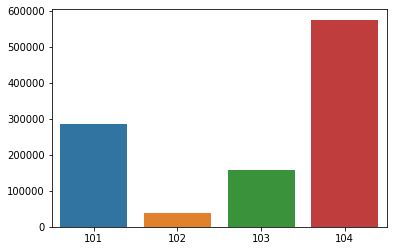

In [206]:
y=nb_transactions.values
x=nb_transactions.index.values
sns.barplot(x=x,y=y)

## Nbre de références d'articles vendues par semaine

In [200]:
week_article_group=transactions_101_104.groupby(['t_dat','article_id'])
week_article_group['article_id'].count()

t_dat  article_id
101    108775044      8
       111565001     26
       111586001     79
       111593001     65
       111609001     28
                     ..
104    952267001     28
       952938001      6
       953450001      8
       953763001     27
       956217002     10
Name: article_id, Length: 68712, dtype: int64

In [209]:
nb_articles=week_article_group['article_id'].count().groupby(['t_dat']).count()
nb_articles

t_dat
101    19793
102     8800
103    15676
104    24443
Name: article_id, dtype: int64

<AxesSubplot:>

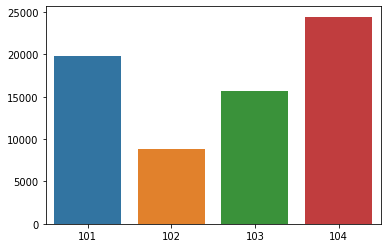

In [210]:
y=nb_articles.values
x=nb_articles.index.values
sns.barplot(x=x,y=y)

## Nbre de ventes par article par semaine¶

In [213]:
transactions_101_104.head()
article_history=transactions_101_104.drop(columns=['customer_id','price','sales_channel_id'])
article_history['in101']=article_history['t_dat'].apply(lambda x: 1 if x==101 else 0)
article_history['in102']=article_history['t_dat'].apply(lambda x: 1 if x==102 else 0)
article_history['in103']=article_history['t_dat'].apply(lambda x: 1 if x==103 else 0)
article_history['in104']=article_history['t_dat'].apply(lambda x: 1 if x==104 else 0)
article_history

,t_dat,article_id,in101,in102,in103,in104
0,101,880553001,1,0,0,0
1,101,880553001,1,0,0,0
2,101,909081004,1,0,0,0
3,101,516903024,1,0,0,0
4,101,897679003,1,0,0,0
...,...,...,...,...,...,...
1057900,104,799365001,0,0,0,1
1057901,104,624486049,0,0,0,1
1057902,104,717490010,0,0,0,1
1057903,104,717490058,0,0,0,1


In [217]:
temp=article_history.groupby(['article_id']).sum()
article_history=temp
article_history['101_to_104']=article_history['in101']+article_history['in102']+article_history['in103']+article_history['in104']
article_history['101_to_103']=article_history['in101']+article_history['in102']+article_history['in103']
article_history['102_to_103']=article_history['in102']+article_history['in103']
# définition des TOP12 selon la période choisies
Top12_101_to_103=article_history.sort_values(by='101_to_103', ascending=False).head(12)
Top12_102_to_103=article_history.sort_values(by='102_to_103', ascending=False).head(12)
Top12_104=article_history.sort_values(by='in104', ascending=False).head(12)

Top12_104

,t_dat,in101,in102,in103,in104,101_to_104,101_to_103,102_to_103
article_id,,,,,,,,
751471001,283533,816,138,367,1435,2756,1321,505
915526001,248284,673,128,289,1322,2412,1090,417
751471043,238198,680,78,262,1294,2314,1020,340
915529003,239229,717,92,236,1280,2325,1045,328
706016001,238685,755,88,258,1220,2321,1101,346
918292001,234233,654,82,345,1195,2276,1081,427
924243001,163327,15,7,414,1139,1575,436,421
918522001,159840,0,0,424,1117,1541,424,424
448509014,193250,356,44,386,1087,1873,786,430


In [218]:
Top12_102_to_103

,t_dat,in101,in102,in103,in104,101_to_104,101_to_103,102_to_103
article_id,,,,,,,,
909370001,185749,0,0,1139,658,1797,1139,1139
933706001,125752,192,500,72,461,1225,764,572
751471001,283533,816,138,367,1435,2756,1321,505
865799006,133760,4,5,482,800,1291,491,487
448509014,193250,356,44,386,1087,1873,786,430
918292001,234233,654,82,345,1195,2276,1081,427
918522001,159840,0,0,424,1117,1541,424,424
924243001,163327,15,7,414,1139,1575,436,421
915526001,248284,673,128,289,1322,2412,1090,417


In [163]:
article_history['101_to_104']=article_history['in101']+article_history['in102']+article_history['in103']+article_history['in104']
article_history['101_to_103']=article_history['in101']+article_history['in102']+article_history['in103']
article_history['102_to_103']=article_history['in102']+article_history['in103']
Top12_101_to_103=article_history.sort_values(by='101_to_103', ascending=False).head(12)
Top12_101_to_103
#Top12_101_to_103.index

,t_dat,in101,in102,in103,in104,101_to_104,102_to_103,101_to_103
article_id,,,,,,,,
751471001,283533,816,138,367,1435,2756,505,1321
909370001,185749,0,0,1139,658,1797,1139,1139
898694001,208136,708,149,250,920,2027,399,1107
706016001,238685,755,88,258,1220,2321,346,1101
915526001,248284,673,128,289,1322,2412,417,1090
918292001,234233,654,82,345,1195,2276,427,1081
915529003,239229,717,92,236,1280,2325,328,1045
751471043,238198,680,78,262,1294,2314,340,1020
915526002,151128,658,78,142,597,1475,220,878


In [119]:
# nbre de transactions (=ventes) par semaine et par article
week_article_group=transactions_101_104.groupby(['t_dat','article_id'])
nb_articles=week_article_group['article_id'].count().sort_values(ascending=False)
nb_articles.head(12) # nb_articles.sum() = 1057905


t_dat  article_id
104    751471001     1435
       915526001     1322
       751471043     1294
       915529003     1280
       706016001     1220
       918292001     1195
       924243001     1139
103    909370001     1139
104    918522001     1117
       448509014     1087
       863595006      985
       919365008      944
Name: article_id, dtype: int64

In [159]:
nb_articles.index

MultiIndex([(104, 751471001),
            (104, 915526001),
            (104, 751471043),
            (104, 915529003),
            (104, 706016001),
            (104, 918292001),
            (104, 924243001),
            (103, 909370001),
            (104, 918522001),
            (104, 448509014),
            ...
            (101, 892860001),
            (103, 887830003),
            (104, 808246003),
            (104, 808237004),
            (101, 847200003),
            (101, 892841001),
            (103, 776237027),
            (103, 776237034),
            (103, 776350009),
            (103, 796210008)],
           names=['t_dat', 'article_id'], length=68712)

In [120]:
nb_articles.sum()

1057905

In [54]:
#week_article_group=transactions_101_104.groupby(['t_dat','article_id'])['customer_id'].count()
article_group=transactions_101_104.groupby(['article_id'])['customer_id'].count().sort_values(ascending=False)

In [58]:
article_group.shape

(28508,)

In [65]:
#TOP12 des semaines 101 à 104 (inclus)
article_group.head(12)

article_id
751471001    2756
915526001    2412
915529003    2325
706016001    2321
751471043    2314
918292001    2276
898694001    2027
448509014    1873
863595006    1813
909370001    1797
850917001    1626
924243001    1575
Name: customer_id, dtype: int64

In [72]:
# TOP12 sur la première semaine de septembre (101)
mask=transactions_101_104['t_dat']==101
transactions_101=transactions_101_104[mask]
transactions_101

article_group_w101=transactions_101.groupby(['article_id'])['customer_id'].count().sort_values(ascending=False)
article_group_w101.head(12)

article_id
751471001    816
706016001    755
915529003    717
898694001    708
916468003    689
751471043    680
915526001    673
915526002    658
918292001    654
915529001    549
884319001    539
803757001    525
Name: customer_id, dtype: int64

In [70]:
# TOP12 sur la première semaine de septembre (102)
mask=transactions_101_104['t_dat']==102
transactions_102=transactions_101_104[mask]
transactions_102

article_group_w102=transactions_102.groupby(['article_id'])['customer_id'].count().sort_values(ascending=False)
article_group_w102.head(12)

article_id
933706001    500
898694001    149
751471001    138
915526001    128
715624053    123
715624001    102
915529003     92
706016001     88
889460003     87
862970001     86
918292001     82
915529001     78
Name: customer_id, dtype: int64

In [71]:
# TOP12 sur la première semaine de septembre (103)
mask=transactions_101_104['t_dat']==103
transactions_103=transactions_101_104[mask]
transactions_103

article_group_w103=transactions_103.groupby(['article_id'])['customer_id'].count().sort_values(ascending=False)
article_group_w103.head(12)

article_id
909370001    1139
865799006     482
918522001     424
924243001     414
809238001     386
448509014     386
751471001     367
809238005     366
918292001     345
762846027     335
673677002     301
929165002     295
Name: customer_id, dtype: int64

In [73]:
# TOP12 sur la 3e semaine de septembre (104)
mask=transactions_101_104['t_dat']==104
transactions_104=transactions_101_104[mask]
transactions_104

article_group_w104=transactions_104.groupby(['article_id'])['customer_id'].count().sort_values(ascending=False)
article_group_w104.head(12)

article_id
751471001    1435
915526001    1322
751471043    1294
915529003    1280
706016001    1220
918292001    1195
924243001    1139
918522001    1117
448509014    1087
863595006     985
919365008     944
898694001     920
Name: customer_id, dtype: int64